# Семинар 6 - Бустинг

В качестве источника используется:
- [Глава 7](https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb) из Книги [Aurélien Geron](https://github.com/ageron)
- материалы [mlcourse.ai](https://mlcourse.ai) от [Юрия Кашницкого](https://yorko.github.io) и [OpenDataScience](https://ods.ai)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

 Поиграем с исскуственным набором данных Луны

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## AdaBoost

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

/Library/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                                    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

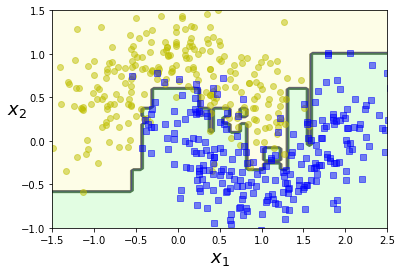

In [5]:
plot_decision_boundary(ada_clf, X, y)

Давайте попробуем, посмотреть что происходит по шагам. Только лишь в Качестве иллюстрации будем использовать SVM

In [6]:
from sklearn.svm import SVC

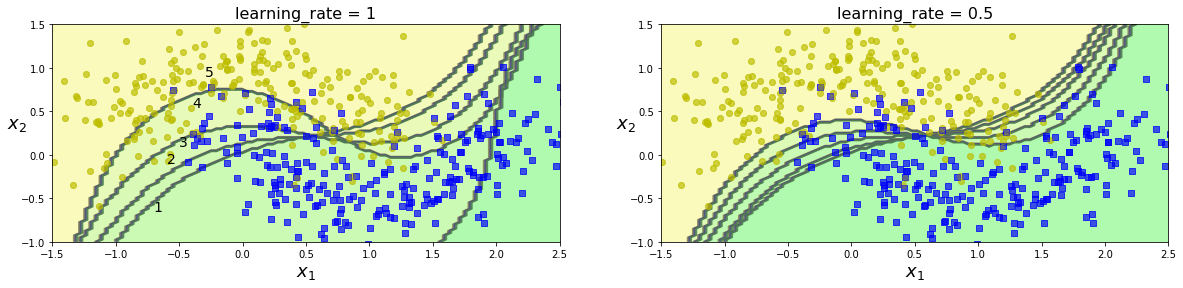

In [7]:
m = len(X_train)

plt.figure(figsize=(20, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

plt.show()

## Gradient Boosting
Для начала посмотрим на игрушечных данных

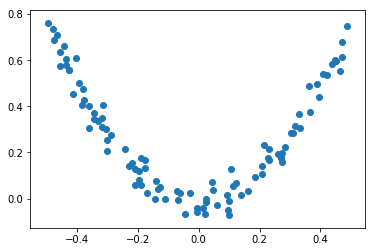

In [8]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

plt.scatter(X,y)
plt.show()

In [9]:
# Построим решающее дерево
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [10]:
# Найдем остатки от прогнозов и построим еще одно дерево
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [11]:
# Найдем остатки от прогнозов и построим еще одно дерево
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [12]:
X_new = np.array([[0.8]])

In [13]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

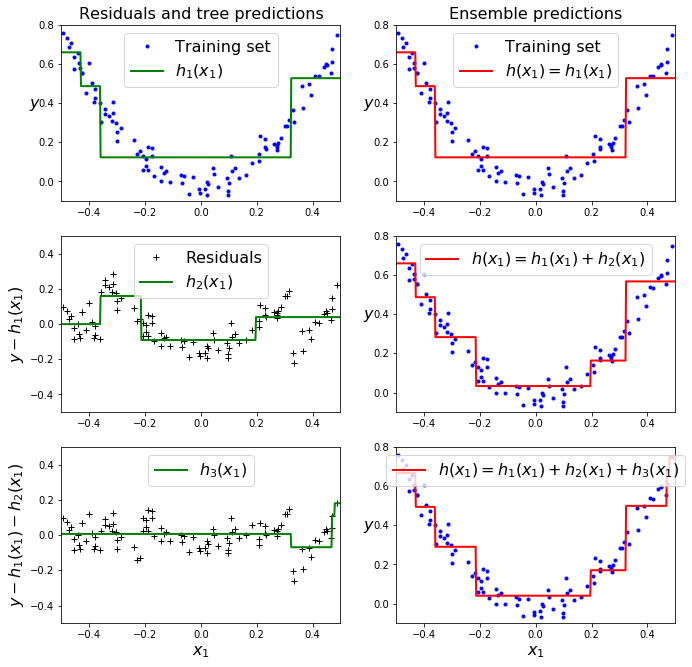

In [14]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)


plt.show()


#### Попробуем реализацию градиентного бустинга из пакета sklearn

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

Посмотрим, как изменятся результаты при разном кол-ве базовых классификаторов

In [16]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

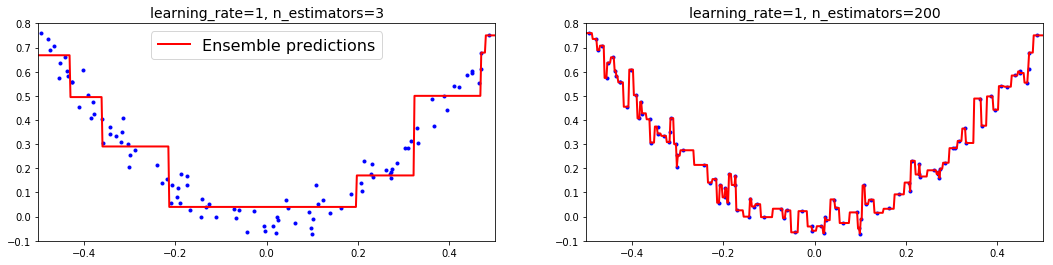

In [18]:
plt.figure(figsize=(18,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)


plt.show()

Посмотрим, как изменятся результаты при разной глубине базовых классификаторов 

In [19]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(max_depth=10, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

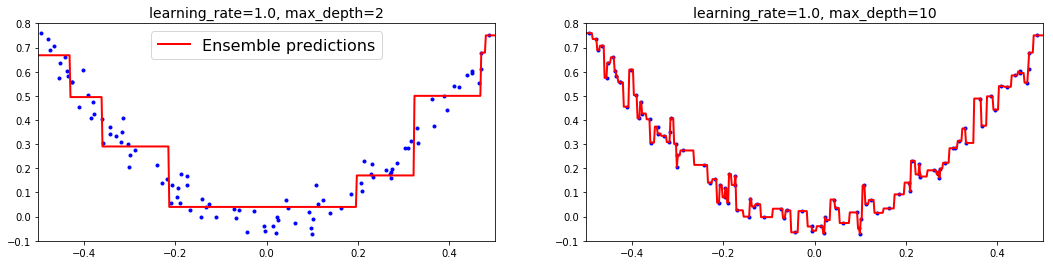

In [20]:
plt.figure(figsize=(18,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, max_depth={}".format(gbrt.learning_rate, gbrt.max_depth), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, max_depth={}".format(gbrt_slow.learning_rate, gbrt_slow.max_depth), fontsize=14)


plt.show()

И что же делать?  
Как контроллировать переобучение? Алгоритм казался таким идеальным...
<img src='../pic/but_why.jpg', width=600>

#### Посмотрим, как ведет себя ошибка на каждой итерации

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)
min_error = np.min(errors)


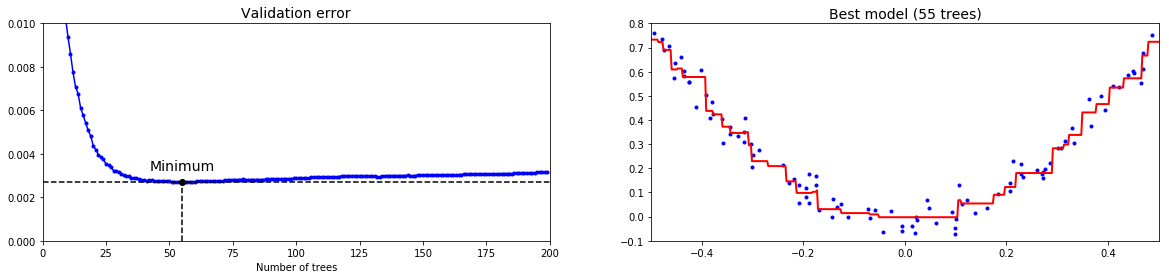

In [22]:
plt.figure(figsize=(20, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 200], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 200, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

## Расчехлим LightGBM

In [23]:
import lightgbm as lgb

In [24]:
# Загрузим данные и проведем предобработки: 
data = pd.read_csv('../data/flight_delays_train.csv')
data['dep_delayed_15min'] = data['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)
data['Month'] = data['Month'].str.replace('c-', '').astype('int16')
data['DayofMonth'] = data['DayofMonth'].str.replace('c-', '').astype('int16')
data['DayOfWeek'] = data['DayOfWeek'].str.replace('c-', '').astype('int16')
data['UniqueCarrier'] = pd.factorize(data['UniqueCarrier'])[0]
data['Origin'] = pd.factorize(data['Origin'])[0]
data['Dest'] = pd.factorize(data['Dest'])[0]

# DepTime пусть бдет более вещественным числом (так как 60 минут в часах)
data['DepTime_real'] = data['DepTime'].apply(lambda x: int(x/100)+((x/100-int(x/100))*100)/59)
data.drop('DepTime', axis=1, inplace=True)


x = data.drop('dep_delayed_15min', axis=1)
y = data['dep_delayed_15min'].values


data.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepTime_real
0,8,21,7,0,0,0,732,0,19.576271
1,4,20,3,1,1,1,834,0,15.813559
2,9,2,5,2,2,2,416,0,14.372881
3,11,25,6,3,3,3,872,0,10.254237
4,10,7,6,4,4,4,423,1,18.474576


Разделим выборку на обучающую и тестовую

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, \
                                                    shuffle=True, random_state=21)

Создадим датасеты, как того требует библиотека

In [26]:
trn_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_test, label=y_test)

Укажем параметры, для того чтобы бустинг решал задачу классификации

In [27]:
param = {
    'boost': 'gbdt',
    'metric':'auc',
    'num_threads': 12,
    'objective': 'binary', 
}

Обучим модель

In [28]:
history = {} # Будем тут хранить историю
clf = lgb.train(param, trn_data, num_boost_round=1000, valid_sets = [trn_data, val_data], 
                verbose_eval=100,  evals_result=history)

[100]	training's auc: 0.780524	valid_1's auc: 0.738647
[200]	training's auc: 0.819746	valid_1's auc: 0.743669
[300]	training's auc: 0.849984	valid_1's auc: 0.745479
[400]	training's auc: 0.874271	valid_1's auc: 0.74589
[500]	training's auc: 0.891837	valid_1's auc: 0.74614
[600]	training's auc: 0.908483	valid_1's auc: 0.746409
[700]	training's auc: 0.921414	valid_1's auc: 0.745756
[800]	training's auc: 0.933888	valid_1's auc: 0.745473
[900]	training's auc: 0.94338	valid_1's auc: 0.745167
[1000]	training's auc: 0.952001	valid_1's auc: 0.745564


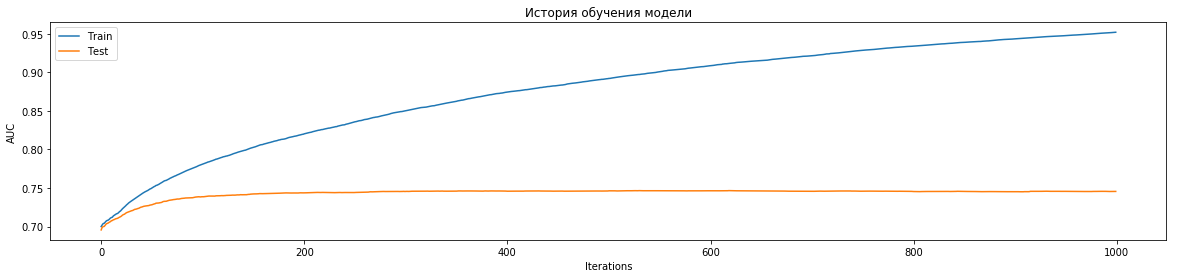

In [29]:
plt.figure(figsize=(20, 4))
plt.plot(history['training']['auc'], label='Train')
plt.plot(history['valid_1']['auc'], label='Test')
plt.xlabel('Iterations')
plt.ylabel('AUC')
plt.title('История обучения модели')
plt.legend()
plt.show()

В документации LightGBM есть целый [раздел](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html) о том, как тюнить параметры. 
Попробуем улучшить качество. 

In [30]:
param = {
    'boost': 'gbdt',
    'metric':'auc',
    'num_threads': 12,
    'objective': 'binary', 
    'bagging_fraction': 0.7, # Не больше 70% выборки
    'feature_fraction': 0.7, # Не больше 70% фич
    'learning_rate': 0.5, # Установим скорость обучения
    'max_depth': 2, # Ограничим дерево 
    'min_data_in_leaf': 100, # Ограничим кол-во объектов в листе 
    'num_leaves': 2, # Ограничим кол-во листьев (Не совсем то, что max_depth)

}

In [31]:
history = {}

# Увеличим кол-во итераций num_boost_round и установим критерий останова early_stopping_rounds

clf = lgb.train(param, trn_data, num_boost_round=3000, valid_sets = [trn_data, val_data], 
                verbose_eval=200,  evals_result=history, early_stopping_rounds = 100)

Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.716157	valid_1's auc: 0.71322
[400]	training's auc: 0.72023	valid_1's auc: 0.716897
[600]	training's auc: 0.722595	valid_1's auc: 0.718878
[800]	training's auc: 0.724123	valid_1's auc: 0.719983
[1000]	training's auc: 0.725225	valid_1's auc: 0.720422
[1200]	training's auc: 0.72601	valid_1's auc: 0.721073
[1400]	training's auc: 0.726737	valid_1's auc: 0.721419
[1600]	training's auc: 0.727367	valid_1's auc: 0.721772
[1800]	training's auc: 0.72782	valid_1's auc: 0.722142
[2000]	training's auc: 0.728282	valid_1's auc: 0.722385
Early stopping, best iteration is:
[1914]	training's auc: 0.728111	valid_1's auc: 0.722413


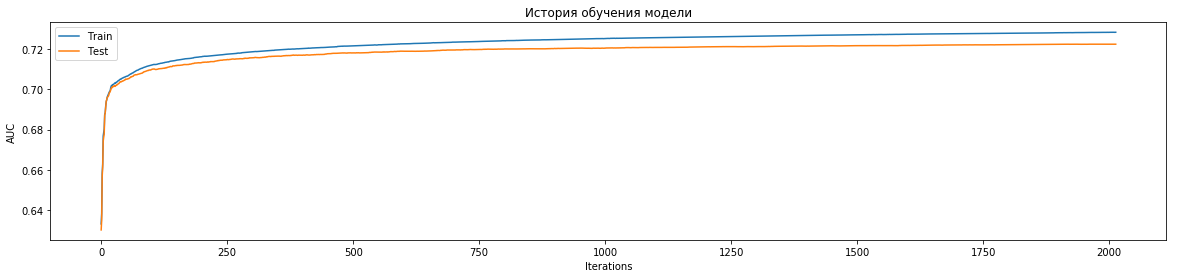

In [32]:
plt.figure(figsize=(20, 4))
plt.plot(history['training']['auc'], label='Train')
plt.plot(history['valid_1']['auc'], label='Test')
plt.xlabel('Iterations')
plt.ylabel('AUC')
plt.title('История обучения модели')
plt.legend()
plt.show()

### Ваш ход! 
Используя различные параметры, попробуйте добиться уровня ROC AUC 0.80 на отложенной выборке